In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Fetch historical data
tickers = [ 'BTC-USD', 'ETH-USD','XRP-USD','SOL-USD','ADA-USD','BNB-USD']
data = yf.download(tickers, start='2022-07-20', end='2024-11-23')['Adj Close']
print(data)

# Calculate daily returns
returns = data.pct_change().dropna()
print(returns)

# Number of assets in the portfolio
num_assets = len(tickers)

# Set up array to hold results + portfolio weights
# 3 for portfolio return, volatility, and Sharpe ratio + one for each asset weight
num_portfolios = 10000
results = np.zeros((3 + num_assets, num_portfolios))

# Continue with the portfolio generation and analysis...


[*********************100%%**********************]  6 of 6 completed

Ticker       ADA-USD     BNB-USD       BTC-USD      ETH-USD     SOL-USD  \
Date                                                                      
2022-07-20  0.491043  258.338806  23231.732422  1520.200684   42.093670   
2022-07-21  0.500098  265.462555  23164.628906  1576.749512   43.190594   
2022-07-22  0.483946  262.877441  22714.978516  1537.405151   40.618504   
2022-07-23  0.517368  259.463013  22465.478516  1549.297485   40.040977   
2022-07-24  0.513814  261.864868  22609.164062  1599.476685   41.006584   
...              ...         ...           ...          ...         ...   
2024-11-18  0.734580  619.435486  90542.640625  3207.856445  239.794250   
2024-11-19  0.739642  615.987427  92343.789062  3111.384033  238.097549   
2024-11-20  0.800345  606.117493  94339.492188  3072.187988  235.423660   
2024-11-21  0.820474  622.826355  98504.726562  3361.053955  257.065887   
2024-11-22  1.010423  633.513428  98997.664062  3331.600830  256.518677   

Ticker       XRP-USD  
D

In [12]:
data

Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,,
2022-07-20,0.491043,258.338806,23231.732422,1520.200684,42.093670,0.360484
2022-07-21,0.500098,265.462555,23164.628906,1576.749512,43.190594,0.367036
2022-07-22,0.483946,262.877441,22714.978516,1537.405151,40.618504,0.358604
2022-07-23,0.517368,259.463013,22465.478516,1549.297485,40.040977,0.359541
2022-07-24,0.513814,261.864868,22609.164062,1599.476685,41.006584,0.359260
...,...,...,...,...,...,...
2024-11-18,0.734580,619.435486,90542.640625,3207.856445,239.794250,1.117936
2024-11-19,0.739642,615.987427,92343.789062,3111.384033,238.097549,1.101947
2024-11-20,0.800345,606.117493,94339.492188,3072.187988,235.423660,1.102301


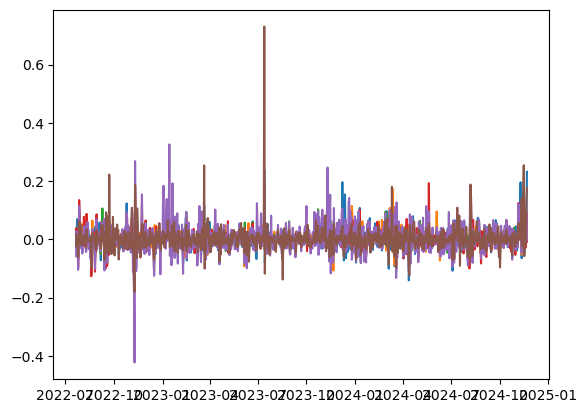

In [15]:
plt.plot(returns)

In [16]:
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio return and standard deviation
    portfolio_return = np.sum(weights * returns.mean()) * 365
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 365, weights)))
    
    # Store results in the array
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    # Calculate Sharpe ratio; risk_free_rate is the risk-free return
    results[2, i] = (portfolio_return - 0.01) / portfolio_stddev
    
    # Store weights
    for j in range(len(weights)):
        results[j + 3, i] = weights[j]


/var/folders/b6/fb60dc_d6bx6dt630rrghmbc0000gn/T/ipykernel_80565/653260666.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Maximum Sharpe ratio')
/var/folders/b6/fb60dc_d6bx6dt630rrghmbc0000gn/T/ipykernel_80565/653260666.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='b', s=500, label='Minimum volatility')


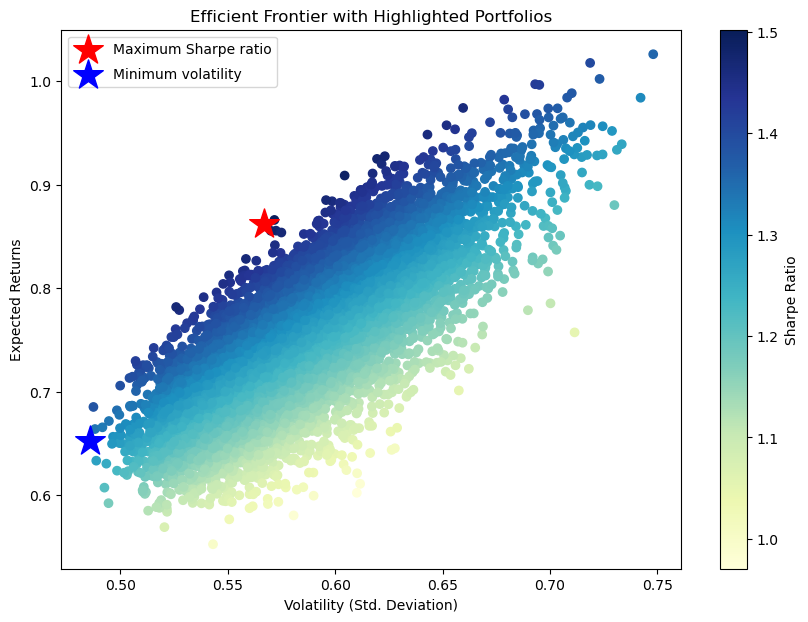

In [18]:
import matplotlib.cm as cm

# Convert results array to Pandas DataFrame for easier handling
results_frame = pd.DataFrame(results.T, columns=['Return', 'StDev', 'Sharpe'] + tickers)

# Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]

# Locate position of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['StDev'].idxmin()]

# Set up the plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(results_frame.StDev, results_frame.Return, c=results_frame.Sharpe, cmap='YlGnBu')
plt.colorbar(scatter, label='Sharpe Ratio')

# Mark the max Sharpe ratio portfolio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Maximum Sharpe ratio')

# Mark the min volatility portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='b', s=500, label='Minimum volatility')

plt.title('Efficient Frontier with Highlighted Portfolios')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.legend(labelspacing=0.8)

plt.show();


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' and 'tickers' are defined correctly up to this point.
# Convert results array to DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe'] + tickers)

# Print columns to verify their names
print(results_frame.columns)

# Locate the maximum Sharpe ratio and minimum volatility
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]

# Output details of the maximum Sharpe ratio portfolio
print("Maximum Sharpe Ratio Portfolio:")
print(f"Return: {max_sharpe_port['Return']:.4f}")
print(f"Volatility: {max_sharpe_port['Volatility']:.4f}")
print(f"Sharpe Ratio: {max_sharpe_port['Sharpe']:.4f}")

# Print each ticker's weight in the maximum Sharpe ratio portfolio
for ticker in tickers:
    print(f"{ticker} Weight: {max_sharpe_port[ticker]:.4f}")


Index(['Return', 'Volatility', 'Sharpe', 'BTC-USD', 'ETH-USD', 'XRP-USD',
       'SOL-USD', 'ADA-USD', 'BNB-USD'],
      dtype='object')
Maximum Sharpe Ratio Portfolio:
Return: 0.8619
Volatility: 0.5671
Sharpe Ratio: 1.5022
BTC-USD Weight: 0.0069
ETH-USD Weight: 0.0202
XRP-USD Weight: 0.5129
SOL-USD Weight: 0.0256
ADA-USD Weight: 0.1593
BNB-USD Weight: 0.2750


In [20]:
import pandas as pd

# Extracting data for the maximum Sharpe ratio portfolio
max_sharpe_data = {
    'Metric': ['Return', 'Volatility', 'Sharpe Ratio'] + [f"{ticker} Weight" for ticker in tickers],
    'Value': [
        max_sharpe_port['Return'],
        max_sharpe_port['Volatility'],
        max_sharpe_port['Sharpe'],
        *[max_sharpe_port[ticker] for ticker in tickers]
    ]
}

# Creating DataFrame
max_sharpe_df = pd.DataFrame(max_sharpe_data)

# Displaying the DataFrame
print("Maximum Sharpe Ratio Portfolio Details:")
display(max_sharpe_df)


Maximum Sharpe Ratio Portfolio Details:


,Metric,Value
0,Return,0.861907
1,Volatility,0.567093
2,Sharpe Ratio,1.502235
3,BTC-USD Weight,0.006892
4,ETH-USD Weight,0.020214
5,XRP-USD Weight,0.512932
6,SOL-USD Weight,0.025629
7,ADA-USD Weight,0.159298
8,BNB-USD Weight,0.275035


In [21]:
# Assuming 'returns' is your DataFrame containing the historical returns of the stocks
correlation_matrix = returns.corr()

# Printing the correlation matrix
print("Correlation Matrix of Stocks in the Portfolio:")
print(correlation_matrix)


Correlation Matrix of Stocks in the Portfolio:
Ticker    ADA-USD   BNB-USD   BTC-USD   ETH-USD   SOL-USD   XRP-USD
Ticker                                                             
ADA-USD  1.000000  0.587857  0.689787  0.699213  0.650661  0.633836
BNB-USD  0.587857  1.000000  0.671367  0.668532  0.590355  0.399712
BTC-USD  0.689787  0.671367  1.000000  0.830768  0.708090  0.482092
ETH-USD  0.699213  0.668532  0.830768  1.000000  0.689219  0.504666
SOL-USD  0.650661  0.590355  0.708090  0.689219  1.000000  0.469450
XRP-USD  0.633836  0.399712  0.482092  0.504666  0.469450  1.000000


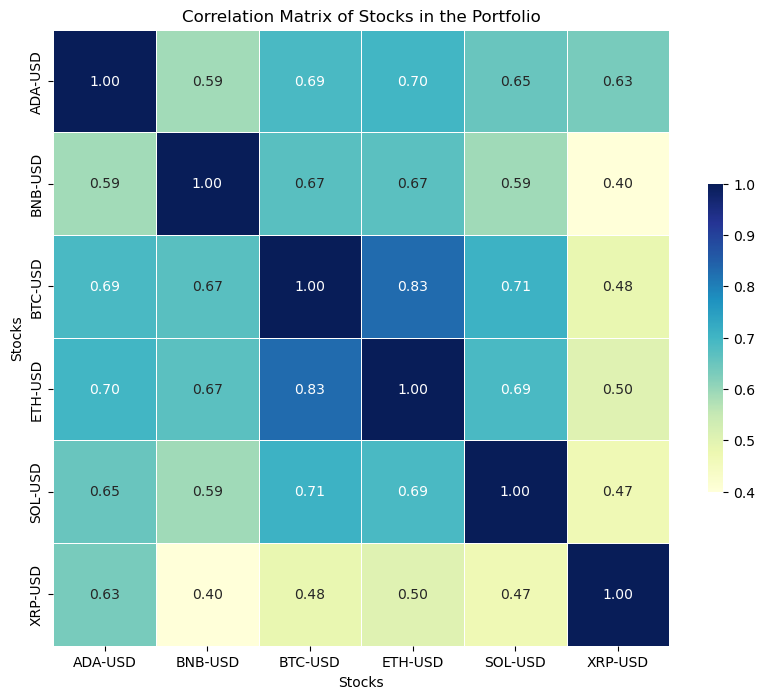

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'returns' is your DataFrame containing the historical returns of the stocks
correlation_matrix = returns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Stocks in the Portfolio')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Show the plot
plt.show()
